In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("D:/Ml projects/Basic ML projects/Datasets/NLP 1/amazon_reviews_us_Office_Products_v1_00.tsv",delimiter='\t',on_bad_lines='skip')
df.head()

C:\Users\sriram\AppData\Local\Temp\ipykernel_2708\3286853520.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("D:/Ml projects/Basic ML projects/Datasets/NLP 1/amazon_reviews_us_Office_Products_v1_00.tsv",delimiter='\t',on_bad_lines='skip')


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0.0,0.0,N,Y,Five Stars,Great product.,2015-08-31
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0.0,1.0,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0.0,0.0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2.0,3.0,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0.0,0.0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31


In [3]:
df.shape

(2640254, 15)

In [29]:
df.dropna(inplace=True)

In [30]:
print(df['marketplace'].unique())
print(df['product_parent'].unique().shape)
print(df['product_category'].unique().shape)
print(df['star_rating'].unique())
print(df['vine'].unique())

['US']
(481,)
(1,)
[5 1 4 2 3]
['N' 'Y']


In [31]:
df.drop(columns=['marketplace','customer_id','review_id','product_id','product_parent','review_date','product_category'],inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_title      500 non-null    object
 1   star_rating        500 non-null    int64 
 2   helpful_votes      500 non-null    int64 
 3   total_votes        500 non-null    int64 
 4   vine               500 non-null    object
 5   verified_purchase  500 non-null    object
 6   review_headline    500 non-null    object
 7   review_body        500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


In [34]:
df.describe()

,star_rating,helpful_votes,total_votes
count,500.000000,500.000000,500.000000
mean,4.210000,0.912000,1.040000
std,1.349646,11.427573,11.466532
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,5.000000,254.000000,254.000000


In [21]:
import spacy
sp=spacy.load("en_core_web_lg")

In [35]:
def preprocess_for_NLP(text):
    modText=sp(text)
    if modText!=None and len(modText)!=0:
        text=" ".join([word.lemma_ for word in modText if not (word.is_stop or word.is_punct or word.is_quote)])
    return text.lower()
    

def preprocess_normal_datas(tempDf):
    tempDf['star_rating']=tempDf['star_rating'].apply(lambda x:int(float(str(x))))
    tempDf['verified_purchase']=tempDf['verified_purchase'].map({"N":0,"Y":1})
    tempDf['vine']=tempDf['vine'].map({"N":0,"Y":1})
    tempDf['product_title']=tempDf['product_title'].apply(preprocess_for_NLP)
    tempDf['review_headline']=tempDf['review_headline'].apply(preprocess_for_NLP)
    tempDf['review_body']=tempDf['review_body'].apply(preprocess_for_NLP)
    return tempDf


In [36]:
df=preprocess_normal_datas(df)

In [37]:
df.head()

,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
0,scotch cushion wrap 7961 12 inch x 100 foot,5,0,0,0,1,star,great product
1,dust compressed gas duster pack 4,5,0,1,0,1,phffffffft phfffffft lot air cool,commodity item come world.<br />have need bnuy...
2,amram tagger standard tag attaching tagging gu...,5,0,0,0,1,sure like,sure like
3,amazonbasics 12 sheet high security micro cut ...,1,2,3,0,1,shredder dirty bin partially shred paper,label 34;new&#34 receive clearly box previousl...
4,derwent colored pencils inktense ink pencils d...,4,0,0,0,1,star,gorgeous color easy use


LETS FIND THE RELATIONSHIP BTW VOTES AND STAR RATING

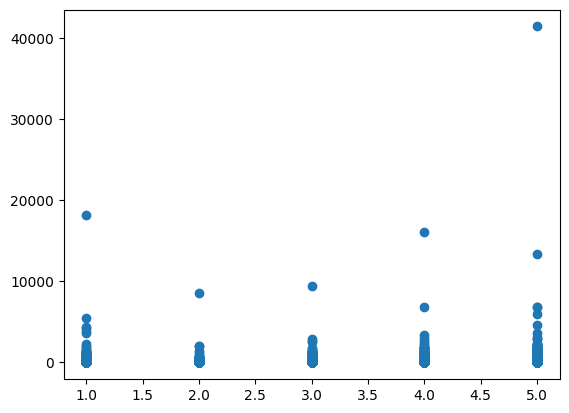

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['star_rating'],df['helpful_votes'])
plt.show()

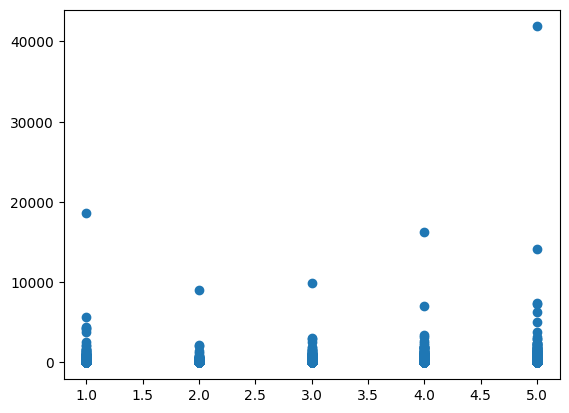

In [14]:
plt.scatter(df['star_rating'],df['total_votes'])

AS THE STAR RATING IS SAME FOR BOTH HELPFULL_VOTES AND TOTAL_VOTES, WE CAN DROP HELPFUL_VOTES

In [38]:
df.drop(columns=['helpful_votes'],inplace=True)


In [39]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['star_rating'])
X_train,X_test,y_train,y_test=train_test_split(X,df['star_rating'],random_state=20,test_size=0.2)

